In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [95]:
thyroid = pd.read_csv('hypothyroid.csv', na_values='?' )
pd.set_option('display.max_columns', None)
thy =thyroid.copy()
thy.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [96]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [97]:
thy.describe(include=[object])

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,f,other,P
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


In [98]:
thy.describe(include='all')


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3771.000000,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3403.000000,3772,3003.000000,3772,3541.000000,3772,3385.000000,3772,3387.000000,3772,0.0,3772,3772
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,NaN,5,2
top,NaN,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,NaN,t,NaN,t,NaN,t,NaN,t,NaN,f,NaN,other,P
freq,NaN,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,NaN,3003,NaN,3541,NaN,3385,NaN,3387,NaN,3772,NaN,2201,3481
mean,51.735879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.086766,NaN,2.013500,NaN,108.319345,NaN,0.995000,NaN,110.469649,NaN,NaN,NaN,NaN
std,20.084958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.521470,NaN,0.827434,NaN,35.604248,NaN,0.195457,NaN,33.089698,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,NaN,0.050000,NaN,2.000000,NaN,0.250000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,1.600000,NaN,88.000000,NaN,0.880000,NaN,93.000000,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,2.000000,NaN,103.000000,NaN,0.980000,NaN,107.000000,NaN,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,2.400000,NaN,124.000000,NaN,1.080000,NaN,124.000000,NaN,NaN,NaN,NaN


### Ecnoding the categorical and binary variables

In [99]:
thy_enc=thy.copy()
# Convert 'sex' and 'binaryClass' to numeric values
thy_enc['sex'] = thy_enc['sex'].map({'F': 0, 'M': 1})
thy_enc['binaryClass'] = thy_enc['binaryClass'].map({'N': 0, 'P': 1})

# Convert other binary variables to numeric values
binary_columns = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                  'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
                  'query hypothyroid', 'query hyperthyroid', 'lithium',
                  'goitre', 'tumor', 'hypopituitary', 'psych',
                  'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
                  'FTI measured']
thy_enc[binary_columns] = thy_enc[binary_columns].replace({'f': 0, 't': 1})

# Verify the updated DataFrame
thy_enc.head(5)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125.0,1,1.14,1,109.0,f,NaN,SVHC,1
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102.0,0,NaN,0,NaN,f,NaN,other,1
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NaN,1,109.0,1,0.91,1,120.0,f,NaN,other,1
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175.0,0,NaN,0,NaN,f,NaN,other,1
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61.0,1,0.87,1,70.0,f,NaN,SVI,1


In [100]:
# Dummyfy categorical column: referral scource as it has 5 unique
ref_dummify = pd.get_dummies(thy_enc['referral source'],prefix='ref_',)

#concatenate
thy_enc = pd.concat([thy_enc,ref_dummify], axis=1)


thy_enc.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125.0,1,1.14,1,109.0,f,NaN,SVHC,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102.0,0,NaN,0,NaN,f,NaN,other,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NaN,1,109.0,1,0.91,1,120.0,f,NaN,other,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175.0,0,NaN,0,NaN,f,NaN,other,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61.0,1,0.87,1,70.0,f,NaN,SVI,1,0,0,0,1,0


1    3481
0     291
Name: binaryClass, dtype: int64

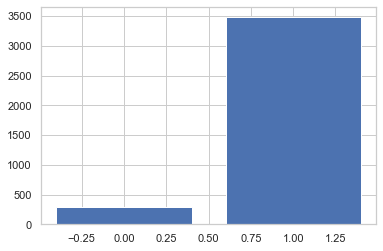

In [101]:
#Imbalanced class
plt.bar(thy_enc.binaryClass.value_counts().index,thy_enc.binaryClass.value_counts().values)
thy_enc.binaryClass.value_counts()

### Checking Missing Data

In [102]:
thy_enc.isna().sum(axis=0).sort_values(ascending=False)

TBG                          3772
T3                            769
T4U                           387
FTI                           385
TSH                           369
TT4                           231
sex                           150
age                             1
I131 treatment                  0
T4U measured                    0
ref__SVI                        0
ref__SVHD                       0
ref__SVHC                       0
ref__STMW                       0
binaryClass                     0
referral source                 0
on thyroxine                    0
TBG measured                    0
query on thyroxine              0
FTI measured                    0
on antithyroid medication       0
sick                            0
query hypothyroid               0
TT4 measured                    0
pregnant                        0
T3 measured                     0
thyroid surgery                 0
TSH measured                    0
psych                           0
hypopituitary 

In [103]:
#checking if missing values corrosponds to 'f' in measured column

col_missing_test_value = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in col_missing_test_value:
    print(col, thy_enc[col].isna().sum(), thy_enc[col][thy_enc[col+' measured']==0].isna().sum())

TSH 369 369
T3 769 769
TT4 231 231
T4U 387 387
FTI 385 385


In [104]:
countinous_col = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']

### Dropping redundant columns

In [105]:
# Drop the original column 'referral source' as dummified, 'TBG'
thy_enc = thy_enc.drop(['referral source','TBG', 'TBG measured'], axis=1)

## EDA

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

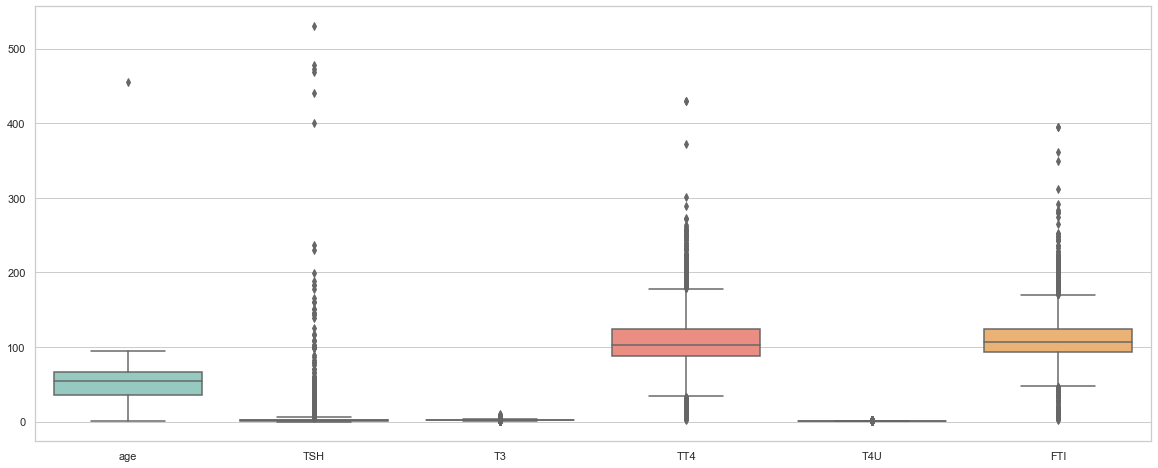

In [106]:
#Boxplot

#list of continuous column names
continuous_cols = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize=(20,8))
# Set a different style for the plot
sns.set(style='whitegrid')
sns.boxplot(data=thy_enc[continuous_cols], palette='Set3')

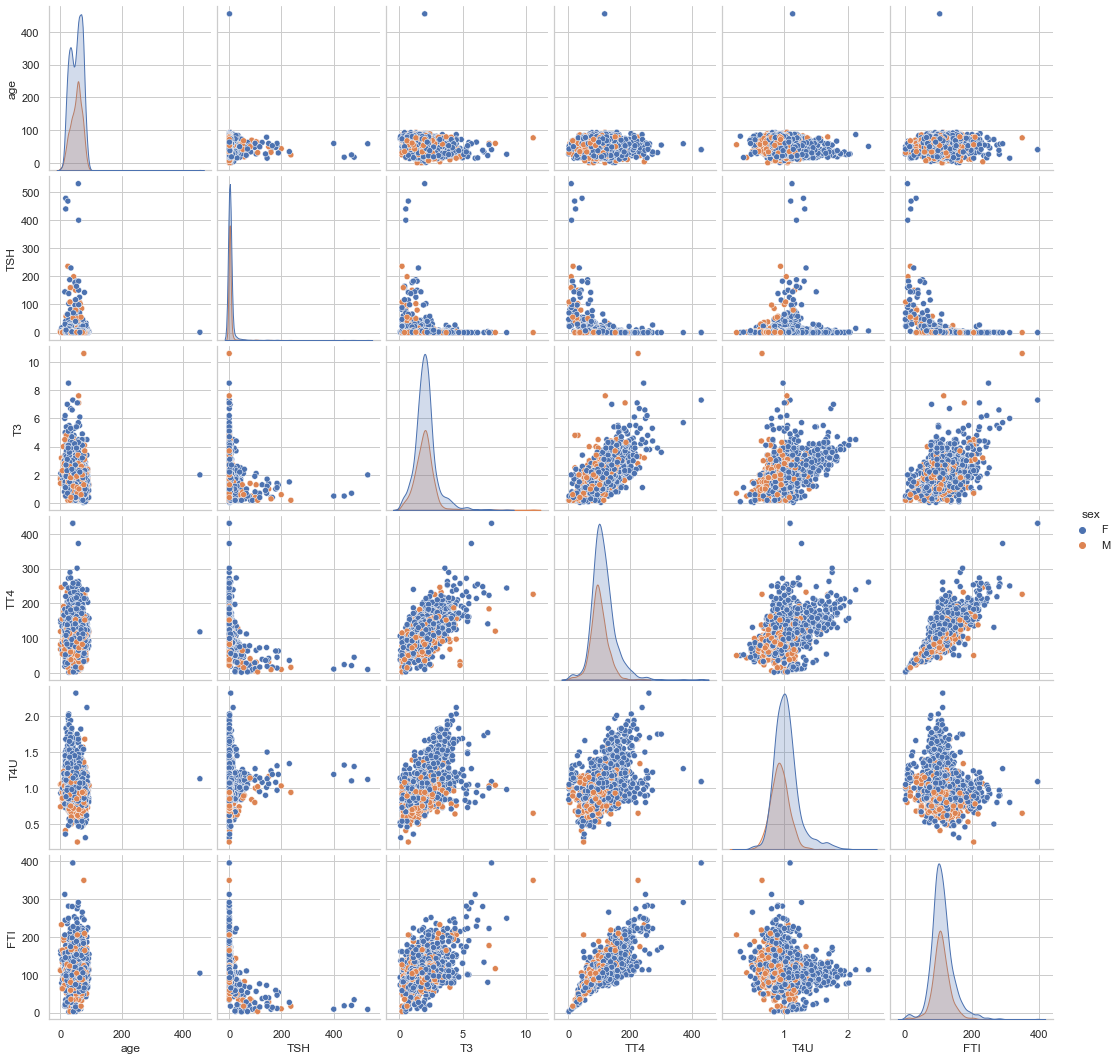

In [107]:
continuous_col = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI','sex']
sns.pairplot(thy[continuous_col], hue="sex",diag_kind='kde' )

### Outlier can be observed in Age column, replacing it to Nan

In [108]:
print(thy_enc.age.max()) #before
thy_enc['age']=thy_enc['age'].replace(thy_enc.age.max(),np.nan)
thy_enc.age.max() #after

455.0


94.0

In [109]:
thy_enc

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125.0,1,1.14,1,109.0,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102.0,0,NaN,0,NaN,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NaN,1,109.0,1,0.91,1,120.0,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175.0,0,NaN,0,NaN,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61.0,1,0.87,1,70.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0,0,0,0,1
3768,68.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.00,1,2.1,1,124.0,1,1.08,1,114.0,1,0,0,0,1,0
3769,74.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5.10,1,1.8,1,112.0,1,1.07,1,105.0,1,0,0,0,0,1
3770,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.70,1,2.0,1,82.0,1,0.94,1,87.0,1,0,0,0,1,0


#### Handling columns with missing 'sex' but pregnancy =True

In [110]:
pregnancy_mask = thy_enc[(thy_enc['pregnant'] == 1) & (thy_enc['sex'].isna())]
pregnancy_mask

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
1609,73.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.2,1,2.5,1,110.0,1,1.28,1,85.0,1,0,0,0,0,1
3271,21.0,NaN,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2.4,1,3.5,1,171.0,1,1.49,1,115.0,1,1,0,0,0,0


In [111]:
thy_enc.loc[pregnancy_mask.index, 'sex'] = 1

In [112]:
thy_enc.iloc[[1609, 3271], :]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
1609,73.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.2,1,2.5,1,110.0,1,1.28,1,85.0,1,0,0,0,0,1
3271,21.0,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2.4,1,3.5,1,171.0,1,1.49,1,115.0,1,1,0,0,0,0


In [113]:
thy_enc.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass', 'ref__STMW', 'ref__SVHC',
       'ref__SVHD', 'ref__SVI', 'ref__other'],
      dtype='object')

### Train Test split

In [114]:
X = thy_enc[['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
             'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre',
             'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4',
             'T4U measured', 'T4U', 'FTI measured', 'FTI', 'ref__STMW', 'ref__SVHC', 'ref__SVHD',
             'ref__SVI', 'ref__other']]

y = thy_enc['binaryClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=13)

In [115]:
y_test.value_counts() #Test set

1    870
0     73
Name: binaryClass, dtype: int64

In [116]:
y_train.value_counts()  #Training set

1    2611
0     218
Name: binaryClass, dtype: int64

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 2185 to 1619
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2827 non-null   float64
 1   sex                        2717 non-null   float64
 2   on thyroxine               2829 non-null   int64  
 3   query on thyroxine         2829 non-null   int64  
 4   on antithyroid medication  2829 non-null   int64  
 5   sick                       2829 non-null   int64  
 6   pregnant                   2829 non-null   int64  
 7   thyroid surgery            2829 non-null   int64  
 8   I131 treatment             2829 non-null   int64  
 9   query hypothyroid          2829 non-null   int64  
 10  query hyperthyroid         2829 non-null   int64  
 11  lithium                    2829 non-null   int64  
 12  goitre                     2829 non-null   int64  
 13  tumor                      2829 non-null   in

In [118]:
#Scaling the train and test data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 
#For the test data, we use the transform method instead of fit_transform.
# This is because we want to apply the same scaling transformation learned from the training data without re-computing the mean and standard deviation.


# Create and fit the KNNImputer
imputer = KNNImputer()
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [119]:
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [129]:
X_train_imputed_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
0,1.119815,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,3.954893,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.108011,0.508382,-0.021954,0.261445,0.725738,0.342489,0.917381,0.341844,0.122517,-0.182307,-0.336662,9.349131,-0.603895,-1.193384
1,-0.726268,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,1.525426,0.508382,-0.388068,0.261445,-1.397057,0.342489,0.250040,0.341844,-1.635931,-0.182307,-0.336662,-0.106962,-0.603895,0.837953
2,-0.620778,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,0.076981,0.508382,0.344160,0.261445,0.074748,0.342489,-0.006630,0.341844,0.031563,-0.182307,-0.336662,-0.106962,-0.603895,0.837953
3,0.803343,1.476990,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.151307,0.508382,-0.632144,0.261445,-0.378115,0.342489,-1.084642,0.341844,0.334744,-0.182307,-0.336662,-0.106962,1.655918,-1.193384
4,1.067069,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.172955,-1.967026,-0.046361,0.261445,0.640827,0.342489,-0.417301,0.341844,1.001741,-0.182307,-0.336662,-0.106962,-0.603895,0.837953


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[ 72   1]
 [  6 864]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       1.00      0.99      1.00       870

    accuracy                           0.99       943
   macro avg       0.96      0.99      0.97       943
weighted avg       0.99      0.99      0.99       943

F1 Score: 0.9959654178674351


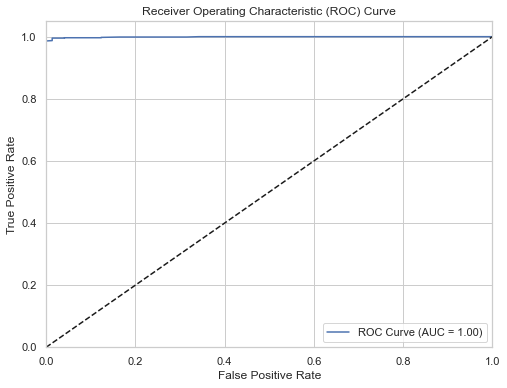

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for class 1
y_pred_proba = rf_classifier.predict_proba(X_test_imputed)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal dotted line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [123]:
#Scaling the train and test data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 
#For the test data, we use the transform method instead of fit_transform.
# This is because we want to apply the same scaling transformation learned from the training data without re-computing the mean and standard deviation.


# Create and fit the KNNImputer
imputer = KNNImputer()
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[ 71   2]
 [  6 864]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       1.00      0.99      1.00       870

    accuracy                           0.99       943
   macro avg       0.96      0.98      0.97       943
weighted avg       0.99      0.99      0.99       943

F1 Score: 0.9953917050691244


scalers = [None, StandardScaler(), MinMaxScaler()]  ||  
classifiers = [RandomForestClassifier(),CatBoostClassifier(silent=True),XGBClassifier(),AdaBoostClassifier(),LogisticRegression(),DecisionTreeClassifier()]

In [127]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

results = []

# Instantiate the KNNImputer
imputer = KNNImputer()

# Define a list of scalers
scalers = [None, StandardScaler(), MinMaxScaler()]

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    CatBoostClassifier(silent=True),
    XGBClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier()
]

# Iterate over scalers
for scaler in scalers:
    if scaler:
        # Scale the training and test data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    # Impute missing values in the training and test data
    X_train_imputed = imputer.fit_transform(X_train_scaled)
    X_test_imputed = imputer.transform(X_test_scaled)
    
    # Iterate over classifiers
    for classifier in classifiers:
        # Instantiate the classifier
        clf = classifier
        
        # Fit the classifier on the training data
        clf.fit(X_train_imputed, y_train)

        # Make predictions on the test data
        y_pred = clf.predict(X_test_imputed)

        # Calculate evaluation metrics
        confusion_mat = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results in a dictionary
        result = {
            'Scaler': type(scaler).__name__,
            'Classifier': type(classifier).__name__,
            'Confusion Matrix': confusion_mat,
            'Classification Report': report,
            'F1 Score': f1
        }

        results.append(result)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame
df_results


C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
0,NoneType,RandomForestClassifier,"[[69, 4], [4, 866]]",precision recall f1-score ...,0.995402
1,NoneType,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
2,NoneType,XGBClassifier,"[[72, 1], [6, 864]]",precision recall f1-score ...,0.995965
3,NoneType,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
4,NoneType,LogisticRegression,"[[44, 29], [4, 866]]",precision recall f1-score ...,0.981303
5,NoneType,DecisionTreeClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
6,StandardScaler,RandomForestClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
7,StandardScaler,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
8,StandardScaler,XGBClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
9,StandardScaler,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125


In [128]:
from IPython.display import display

# Group the DataFrame by Classifier
df_grouped = df_results.groupby('Classifier')

# Iterate over the grouped DataFrame
for classifier, group in df_grouped:
    # Display the classifier name
    display(f"Classifier: {classifier}\n")
    
    # Display the group DataFrame
    display(group)
    display('\n')


'Classifier: AdaBoostClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
3,NoneType,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
9,StandardScaler,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
15,MinMaxScaler,AdaBoostClassifier,"[[71, 2], [4, 866]]",precision recall f1-score ...,0.996548


'\n'

'Classifier: CatBoostClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
1,NoneType,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
7,StandardScaler,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
13,MinMaxScaler,CatBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125


'\n'

'Classifier: DecisionTreeClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
5,NoneType,DecisionTreeClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
11,StandardScaler,DecisionTreeClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
17,MinMaxScaler,DecisionTreeClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125


'\n'

'Classifier: LogisticRegression\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
4,NoneType,LogisticRegression,"[[44, 29], [4, 866]]",precision recall f1-score ...,0.981303
10,StandardScaler,LogisticRegression,"[[44, 29], [2, 868]]",precision recall f1-score ...,0.982456
16,MinMaxScaler,LogisticRegression,"[[10, 63], [1, 869]]",precision recall f1-score ...,0.964484


'\n'

'Classifier: RandomForestClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
0,NoneType,RandomForestClassifier,"[[69, 4], [4, 866]]",precision recall f1-score ...,0.995402
6,StandardScaler,RandomForestClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
12,MinMaxScaler,RandomForestClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544


'\n'

'Classifier: XGBClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
2,NoneType,XGBClassifier,"[[72, 1], [6, 864]]",precision recall f1-score ...,0.995965
8,StandardScaler,XGBClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
14,MinMaxScaler,XGBClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125


'\n'